# Linear Regression From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [2]:
def plot_data_2d(x, y):
    # plt.figure()
    plt.scatter(x, y.flatten(), marker='x', c='r', zorder=2)
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    # plt.show()
    
    
def plot_data_3d(X, Y, Z):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter3D(X, Y, Z, cmap='hsv')

# Normalize features

def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Compute cost
def compute_cost(X, Y, theta):
    m = len(Y)
    error = np.dot(X, theta) - Y
    const = 2 * m
    J = (1 / const) * (np.dot(error.T, error))
    return J

# Gradient descent to update parameters
def gradient_descent(X, Y, theta, alpha, num_iters, normalize=False):

    m = len(Y)
    J_history = np.zeros((num_iters, 1))
    mu = 0
    sigma = 1

    if normalize:
        X, mu, sigma = feature_normalize(X)

    # add a column of ones to x
    X = np.insert(X, 0, 1, axis=1)

    for num in range(num_iters):
        h = np.dot(X, theta)
        error = h - Y
        delta = np.dot(X.T, error) / m
        theta = theta - alpha * delta

        J_history[num] = compute_cost(X, Y, theta)
        if num % 100 == 0:
            print("Iteration ", num, ": cost ", J_history[num])

    return theta, J_history, mu, sigma

# Predict other data
def predict(test, theta, mu, sigma):

    # normalize test data
    test = (test - mu) / sigma
    # add a column of ones to x
    test = np.insert(test, 0, 1, axis=1)

    return np.dot(test, theta)

def train(X, Y, theta, alpha, num_iters, normalize=False):
    alpha = alpha
    num_iters = num_iters

    theta, J_history, mu, sigma = gradient_descent(
        X, Y, theta, alpha, num_iters, normalize)

    return theta, J_history, mu, sigma, normalize


# Building Linear Regression Model for 2d Data

The file ex1data1.txt contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [3]:
file_path = 'data/ex1data1.txt'

In [4]:
data = pd.read_csv(file_path, names=['Population', 'Profit'])

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [7]:
# Convert pandas dataframe to numpy array
numpy_data = data.values # or np.array(data)
n_row, n_col = numpy_data.shape

X = numpy_data[:, 0:n_col - 1].reshape(n_row, n_col - 1)
Y = numpy_data[:, n_col - 1].reshape(n_row, 1)

m = len(X)

In [8]:
print('Size of Data is: ', m)
print('Shape of Features: ', X.shape)
print('Number of features: ', X.shape[1])

Size of Data is:  97
Shape of Features:  (97, 1)
Number of features:  1


Text(0.5, 1.0, 'Population vs Profit')

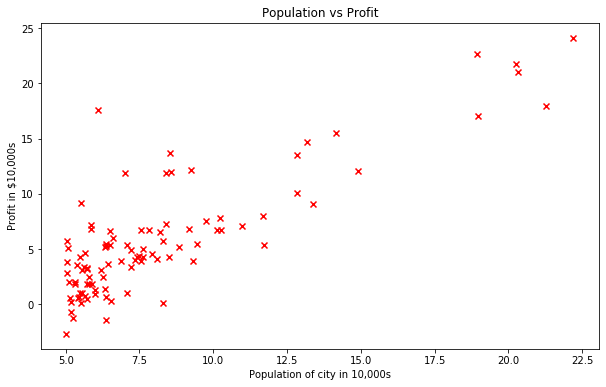

In [9]:
fig = plt.figure(figsize=(10,6))
plot_data_2d(X, Y)
plt.title('Population vs Profit')

In [10]:
initial_theta = np.zeros((X.shape[1] + 1, 1))
alpha = 0.01
num_iters = 1500

In [11]:
theta, J_history, mu, sigma, normalize = train(X, Y, initial_theta, alpha, num_iters, normalize=True)
print('theta: ', theta)

Iteration  0 : cost  [31.5235782]
Iteration  100 : cost  [8.10066696]
Iteration  200 : cost  [4.96247293]
Iteration  300 : cost  [4.54201872]
Iteration  400 : cost  [4.4856864]
Iteration  500 : cost  [4.47813901]
Iteration  600 : cost  [4.47712782]
Iteration  700 : cost  [4.47699234]
Iteration  800 : cost  [4.47697418]
Iteration  900 : cost  [4.47697175]
Iteration  1000 : cost  [4.47697143]
Iteration  1100 : cost  [4.47697138]
Iteration  1200 : cost  [4.47697138]
Iteration  1300 : cost  [4.47697138]
Iteration  1400 : cost  [4.47697138]
theta:  [[5.8391334 ]
 [4.59303983]]


In [12]:
test = np.array([[3.5]])
# result = predict(test, theta, mu, sigma) * 10000
result = predict(test, theta, mu, sigma) * 10000
print(f'For population = {int(test[0][0]) * 10000}, we predict a profit of ${result[0][0]:.2f}')

For population = 30000, we predict a profit of $2798.37


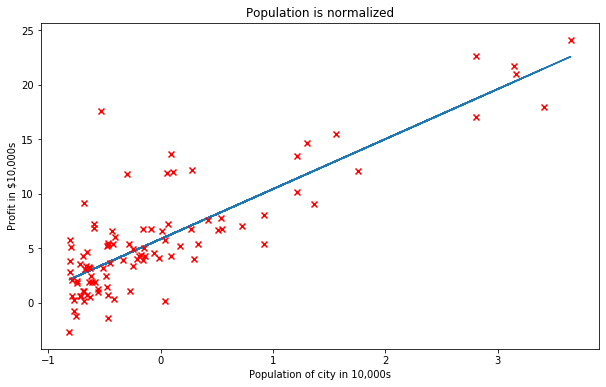

In [13]:
plt.figure(figsize=(10,6))
if normalize:
    X, _, _ = feature_normalize(X)
    plt.title('Population is normalized')
else:
    plt.title('Population is not normalized')
plt.plot(X, np.dot(np.insert(X, 0, 1, axis=1), theta), zorder=1)
plot_data_2d(X, Y)

# Multivariate Linear Regression Model for 3d Data

The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [14]:
data2 = pd.read_csv('data/ex1data2.txt', names=['Size', 'No of Bedrooms', 'Price'])

In [15]:
data2.head()

,Size,No of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
data2.tail()

,Size,No of Bedrooms,Price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [17]:
# Convert pandas dataframe to numpy array
numpy_data = data2.values
n_row, n_col = numpy_data.shape

X = numpy_data[:, 0:n_col - 1].reshape(n_row, n_col - 1)
Y = numpy_data[:, n_col - 1].reshape(n_row, 1)

m = len(X)

In [18]:
print('Size of Data is: ', m)
print('Shape of Features: ', X.shape)
print('Number of features: ', X.shape[1])

Size of Data is:  47
Shape of Features:  (47, 2)
Number of features:  2


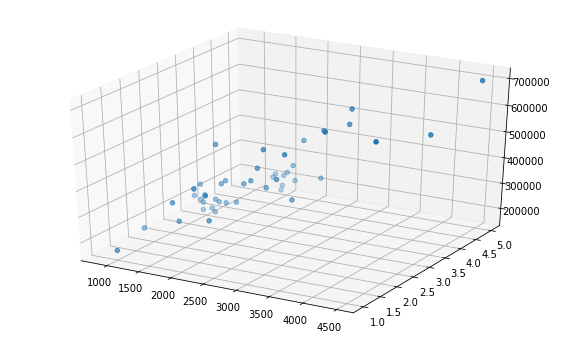

In [19]:
plot_data_3d(X[:,0], X[:,1], Y)

In [20]:
initial_theta = np.zeros((X.shape[1] + 1, 1))
alpha = 0.01
num_iters = 1500

In [21]:
theta, J_history, mu, sigma, normalize = train(X, Y, initial_theta, alpha, num_iters, normalize=True)
print('theta: ', theta)

Iteration  0 : cost  [6.42977763e+10]
Iteration  100 : cost  [1.04316011e+10]
Iteration  200 : cost  [3.32160782e+09]
Iteration  300 : cost  [2.2842987e+09]
Iteration  400 : cost  [2.10469447e+09]
Iteration  500 : cost  [2.06357454e+09]
Iteration  600 : cost  [2.05099438e+09]
Iteration  700 : cost  [2.04638144e+09]
Iteration  800 : cost  [2.04455155e+09]
Iteration  900 : cost  [2.04380474e+09]
Iteration  1000 : cost  [2.04349702e+09]
Iteration  1100 : cost  [2.04336984e+09]
Iteration  1200 : cost  [2.04331721e+09]
Iteration  1300 : cost  [2.04329543e+09]
Iteration  1400 : cost  [2.04328642e+09]
theta:  [[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]


In [22]:
# Predicted price of a 1650 sq-ft, 3 br house (using gradient descent)
test = np.array([[1650, 3]], dtype='int')
result = predict(test, theta, mu, sigma)
print(f'Predicted price of a {test[0][0]} sq-ft, {test[0][1]} br house (using gradient descent) ${result[0][0]:.2f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent) $293098.47
